# Final Group Project 4 (NLP)
- Aida Sarinzhipova
- Chris Korabik
- Feby Hadayani
- Paul Pham-Ly

## LSTM
### Recurrent Neural Network capturing Long-Term Dependencies in Sequences

- Concise Description: Provide a brief overview of the model and your application (include references or links).
- Data Description: Provide a high-level overview of the dataset, including examples, source, structure, and key fields.
- Key Components of the Model: Highlight the core elements of the model, including its mathematical formulation and, if applicable, the architecture (e.g., neural network) with relevant visuals or diagrams.
- Train Description: Provide a step-by-step explanation of how the model is trained.
- Train/Test Results: Summarize key training and testing outcomes, interpret what they indicate about model performance.
- Deployment: Demonstrate how the trained model can be applied in practice. Provide a few illustrative examples.
- Requirements: List system requirements (e.g., OS, Python version, package versions) needed to run your notebook.
- Conclusions: Summarize what was learned and any key takeaways.

## Concise Description

### Traditional RNNs
- RNNs are a family of models used for processing sequential data
- Look very much like a feedforward networks but also have connections pointed backward
- The purpose of RNNs is to model sequential dependencies by maintaining a "hidden state" vector that encodes past inputs
- The hidden state vector is updated for every element (or time step) in the sequence, using the current input vector and the previous hidden state vector
- RNNs can be used for various NLP tasks: language model (generation), sequence classification, token classification, etc.

### An unrolled recurrent neural network
<div style="text-align: center;">
  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" width="500"><br><br>
</div>

### Why Not Plain RNNs?

Standard RNNs update the hidden state as:

$$
h_t = \tanh(W_h h_{t-1} + W_x x_t)
$$

But over many steps, gradients shrink and learning fails — this is the **vanishing gradient problem**.

As a result, RNNs struggle to remember information from far in the past.

### What is an LSTM?
Long Short-Term Memory (LSTM) networks are a specialized type of Recurrent Neural Network (RNN) designed to capture long-term dependencies in sequential data.

They overcome the limitations of traditional RNNs by introducing a **cell state** and **gating mechanisms** that learn what information to keep or forget.

This makes LSTMs highly effective for tasks like:

- Language modeling
- Music genre classification
- Sentiment analysis
- Time series forecasting

### How Do LSTMs Help?

LSTM is an architecture that enables the network to learn to forget certain information while maintaining other information

LSTMs do this by introducing 2 keys components:

- A **cell state** ($c_t$) that carries long-term information (across many timesteps)
- Three **gates** that control information flow:
  - Forget Gate — What to discard
  - Input Gate — What new info to store
  - Output Gate — What to output

Gates are linear layers with an activation that pushes each vector element toward 0 or 1, effectively acting as a mask to control information flow.

The cell state flows through time with minimal changes, letting gradients flow more easily during training.

### Summary: Why LSTMs Work

1. LSTM networks maintain a separate cell state $c_t$ for long-term memory.

2. Gates learn what to keep, update, and discard.

3. Gradients flow more effectively across time, enabling learning from long-range dependencies.

This makes LSTMs a go-to model for many sequence-based problems — including our task: **music genre classification**.`

## Key Components of the Model
### The repeating module in an LSTM contains four interacting layers

<div style="text-align: center;">
  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png" width="800"><br><br>
  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM2-notation.png" width="500">
</div>

### Let:
- \( x_t \): input at time \( t \) --> blue
- \( h_t \): hidden state (output) --> purple
- \( c_t \): cell state (memory) --> the horizontal line running through the top of the diagram

### The Cell State
The cell state is kind of like a conveyor belt. It runs straight down the entire chain, with only some minor linear interactions. It’s very easy for information to just flow along it unchanged.

The LSTM does have the ability to remove or add information to the cell state, carefully regulated by structures called gates.

<div style="display: flex; justify-content: space-between; align-items: center;">
  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-C-line.png" width="600">
  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-gate.png" width="150">
</div>

### Gates
Gates are a way to optionally let information through. They are composed out of a sigmoid neural net layer and a pointwise multiplication operation.

The sigmoid layer outputs numbers between zero and one, describing how much of each component should be let through. A value of zero means “let nothing through,” while a value of one means “let everything through!”

#### Forget Gate Layer (Left)
The first step in our LSTM is to decide what information we’re going to throw away from the cell state.
#### Add/Input/Update Layer (Right)
The next step is to decide what new information we’re going to store in the cell state. This has two parts. First, a sigmoid layer called the “input gate layer” decides which values we’ll update. Next, a tanh layer creates a vector of new candidate values, C̃ t, that could be added to the state. In the next step, we’ll combine these two to create an update to the state.

<div style="display: flex; justify-content: space-between; align-items: center;">
  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-f.png" width="500">
  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-i.png" width="500">
</div>

### Update Cell Value
It’s now time to update the old cell state, Ct−1, into the new cell state Ct. The previous steps already decided what to do, we just need to actually do it.

<div style="display: flex; justify-content: space-between; align-items: center;">
  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-C.png" width="500">
</div>

### Output Gate
Finally, we need to decide what we’re going to output. This output will be based on our cell state, but will be a filtered version. First, we run a sigmoid layer which decides what parts of the cell state we’re going to output. Then, we put the cell state through tanh (to push the values to be between −1 and 1) and multiply it by the output of the sigmoid gate, so that we only output the parts we decided to.

<div style="display: flex; justify-content: space-between; align-items: center;">
  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-o.png" width="500">
</div>

---

### Our Application

In this project, we leverage an LSTM-based neural network to perform **automatic music genre classification** from audio data. Our model learns to recognize genre-specific patterns in waveforms extracted from MP3 files, treating each clip as a time series of acoustic signals.

We use the **GTZAN dataset**, which includes 1,000 audio clips (30 seconds and 3 seconds each) evenly distributed across 10 genres (e.g., rock, classical, jazz, pop, metal). MP3 files are converted to standardized waveform arrays for model input. As part of our evaluation, we also test the model’s ability to generalize to audio samples beyond the training dataset.

**Goal**: Accurately classify a given audio clip into one of 10 music genres using only its waveform structure.

**References**:
- Hochreiter & Schmidhuber (1997). *Long Short-Term Memory*. [[PDF]](https://www.bioinf.jku.at/publications/older/2604.pdf)
- Colah’s Blog: [Understanding LSTMs](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
- Keras LSTM Documentation: [LSTM Layer](https://keras.io/api/layers/recurrent_layers/lstm/)
- Prof. Ignas Lecture Notes (Natural Language & Processing Class)

**Application**:
Can help with tasks like:

- Music recommendation systems
- Audio tagging
- Automatic DJing or playlist generation



## Data Description

We use the **GTZAN Genre Collection** dataset published on Kaggle.

- **Source/Access**: Publicly available [here](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification)
- **Total Samples**: 1,000
- **Clip Length**: 30 seconds per track
- **Format**: `.wav` (preconverted from original `.au`)
- **Sampling Rate**: 22,050 Hz
- **Genres (10 total)**:
  - `blues`, `classical`, `country`, `disco`, `hiphop`, `jazz`, `metal`, `pop`, `reggae`, `rock`

Each folder/genre contains 100 audio clips named like `genre.00000.wav`.

### Features Used

- **Raw waveform** extracted from each `.wav` file as a 1D array of amplitude values over time

### Example:

- File: `jazz/jazz.00034.wav`
- Label: `jazz`
- Shape: 660,000 time steps (30 sec × 22050 Hz), normalized to fixed length

## Train Description


### Load the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [ ]:
!pip install kaggle

In [ ]:
import kagglehub
andradaolteanu_gtzan_dataset_music_genre_classification_path = kagglehub.dataset_download('andradaolteanu/gtzan-dataset-music-genre-classification')

print('Data source import complete.')


Data source import complete.


In [ ]:
import librosa, IPython
import librosa.display
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: /content


In [ ]:
# Changed the file path to include the path to the mounted drive
audio_data = '/content/drive/MyDrive/data/genres_original/classical/classical.00096.wav'
data , sr = librosa.load(audio_data) #. The variable sr contains the sampling rate, the number of samples per second of audio.
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
# Loads and decodes the audio as a time series data
data , sr = librosa.load(audio_data)

In [ ]:
# Returns an audio time series as a numpy array with a default sampling rate(sr) at 45.6KHz
librosa.load(audio_data, sr=45600)

(array([-0.07759668, -0.10805784, -0.09840346, ..., -0.06370816,
        -0.05586784, -0.02773914], dtype=float32),
 45600)

In [ ]:
# Play sample audio of a classical piece
import IPython
IPython.display.Audio(data, rate=sr)

### EDA

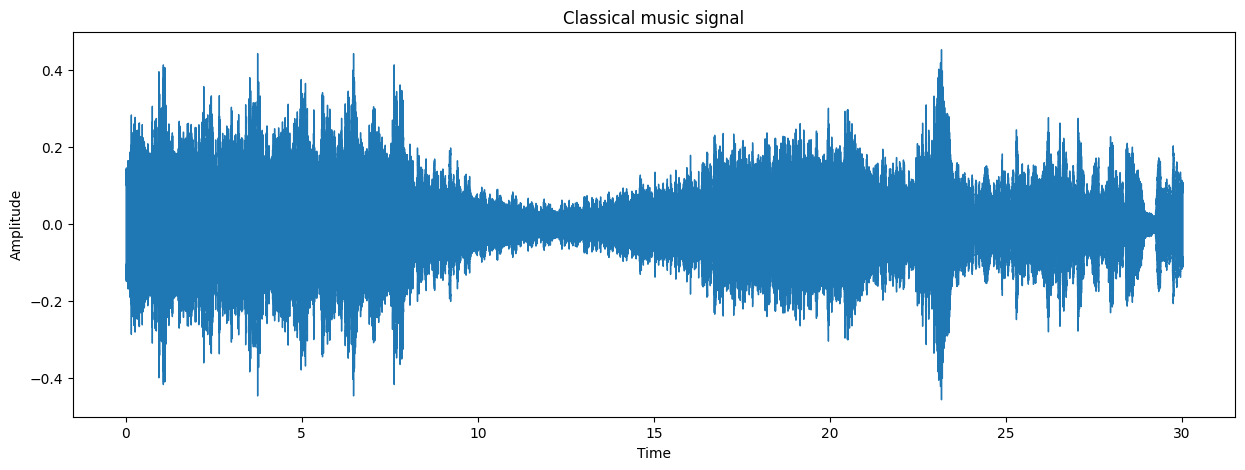

In [ ]:
import librosa, IPython
import librosa.display
# Display the amplitude in a time series format for classical music
plt.figure(figsize=(15,5))
librosa.display.waveshow(data , sr = sr)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Classical music signal")
plt.show()

A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform.

A spectrogram is usually depicted as a heat map with the intensity shown by varying the color or brightness.

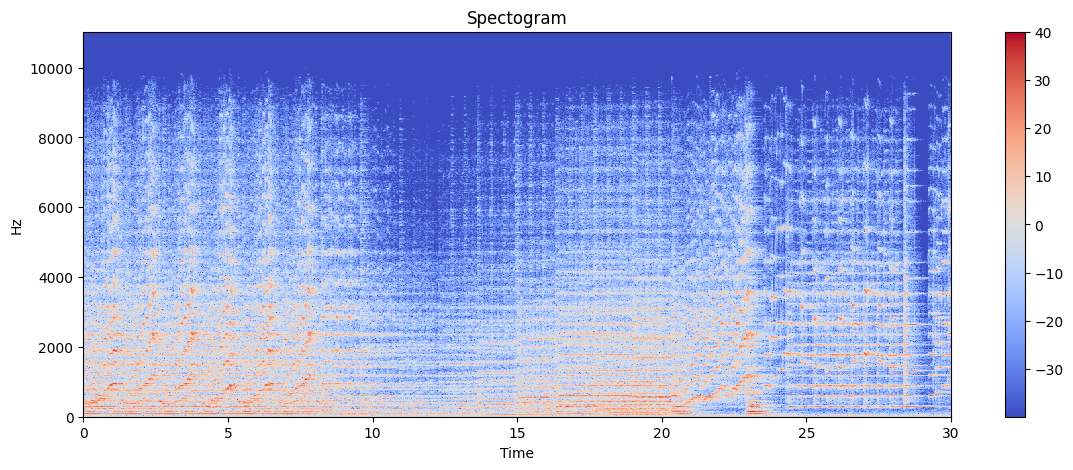

In [ ]:
#Spectogram of classical piece
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.title("Spectogram")
plt.colorbar()

- Waveform: raw sound over time
- Mel Spectogram: How pitch content changes over time

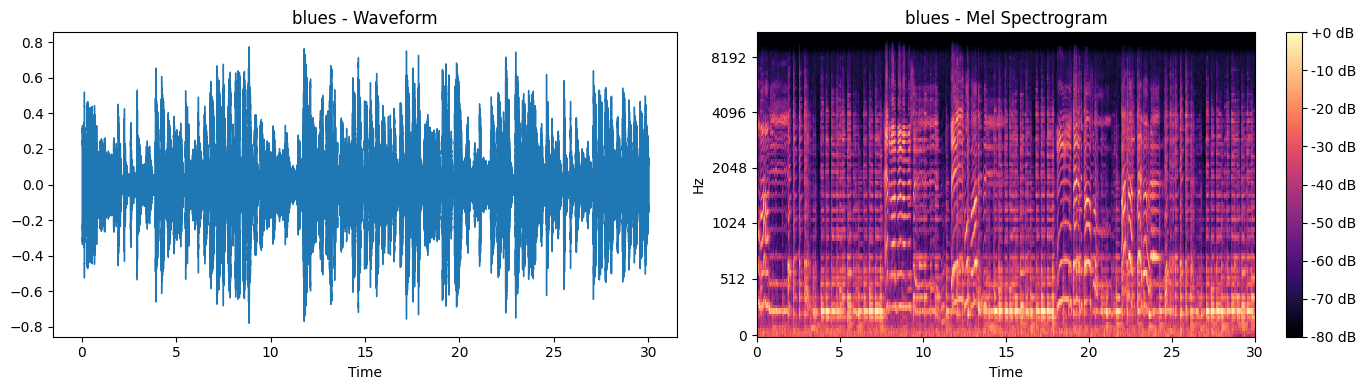

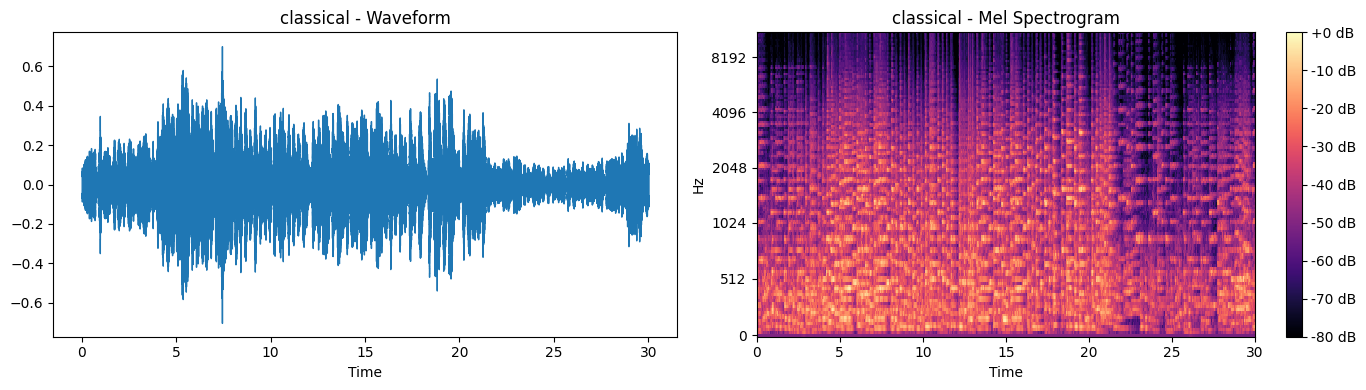

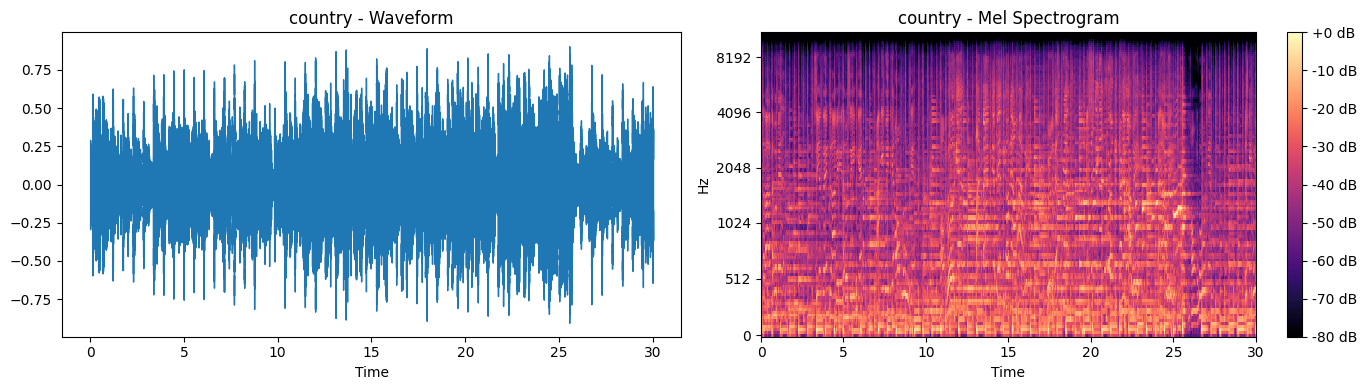

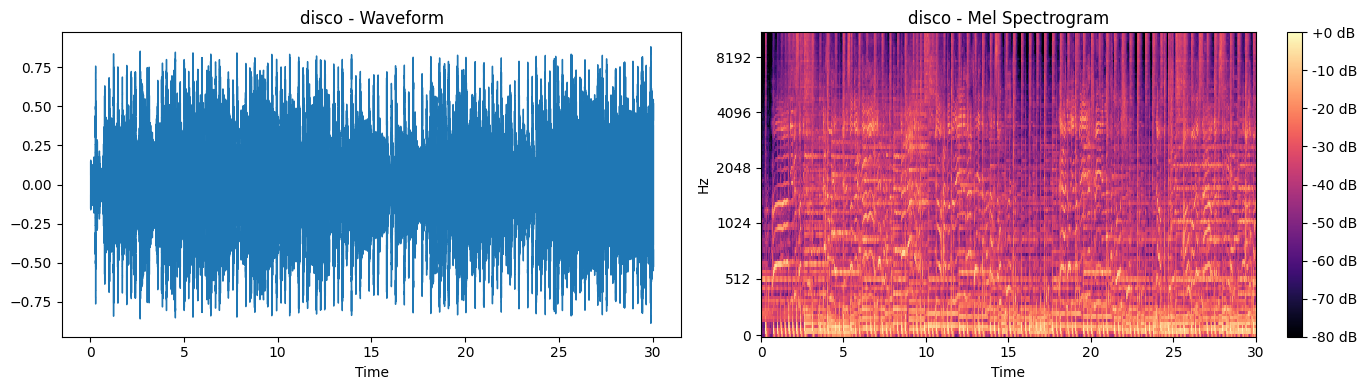

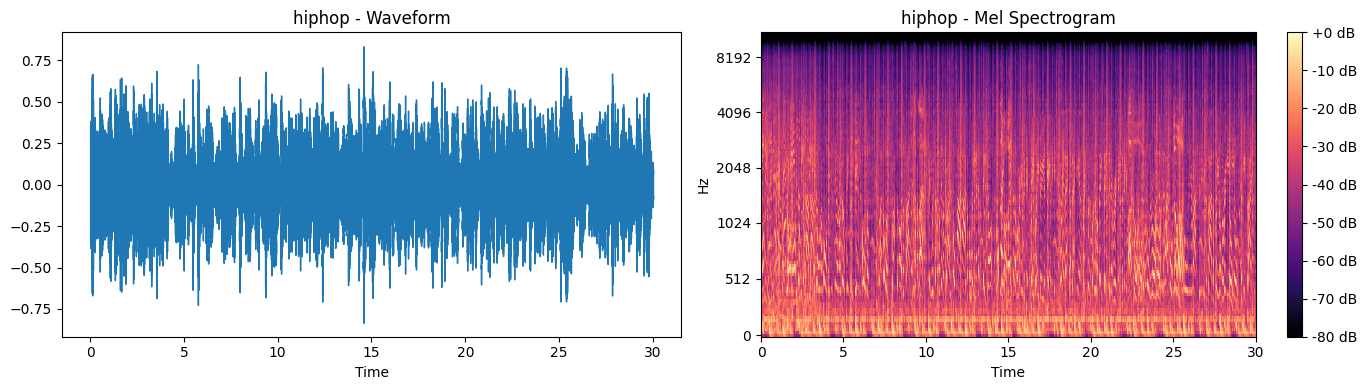

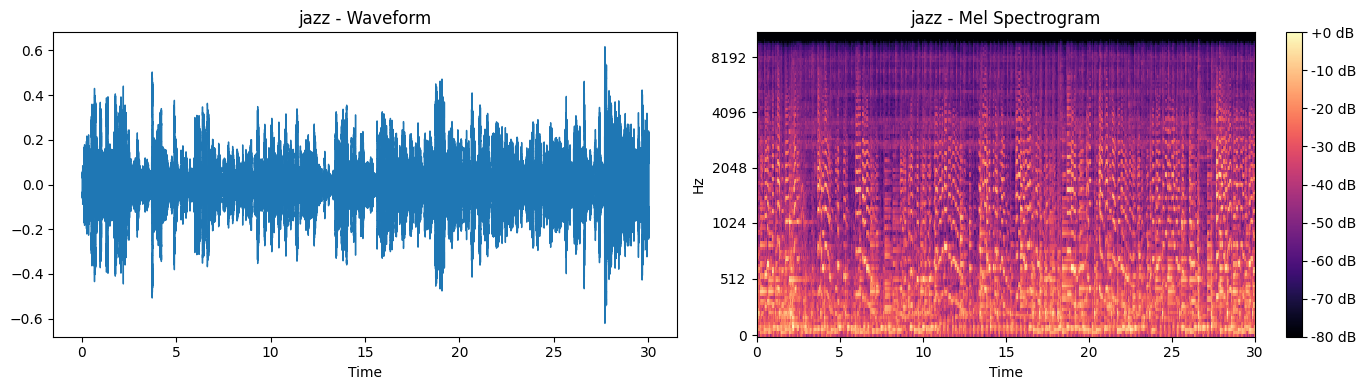

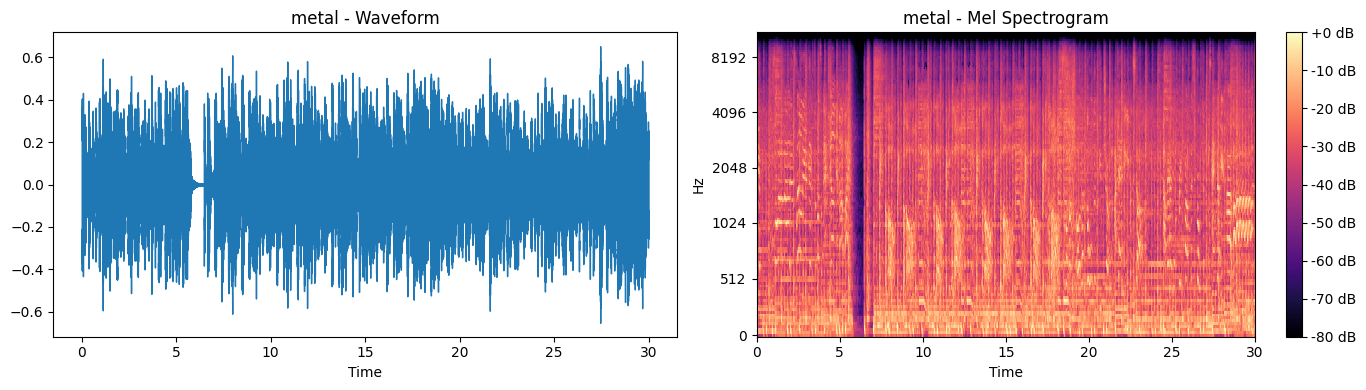

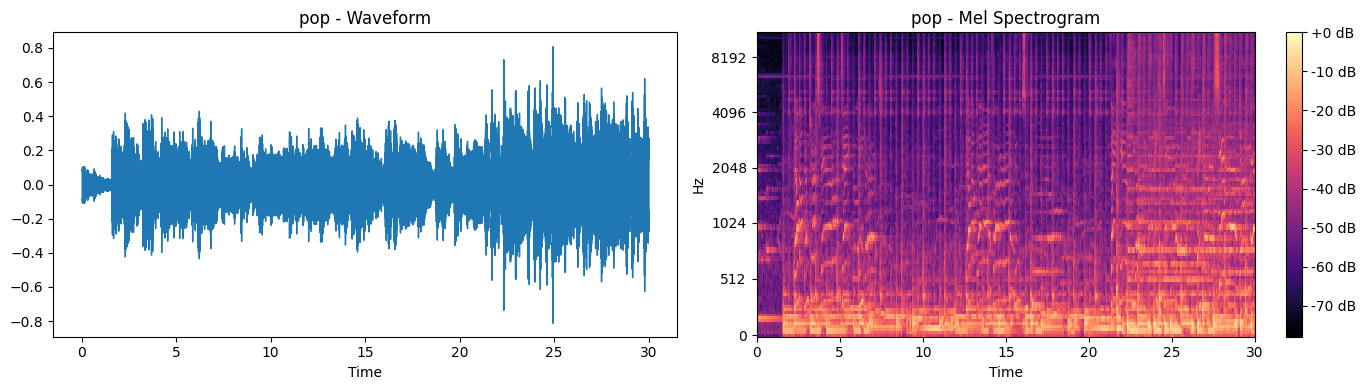

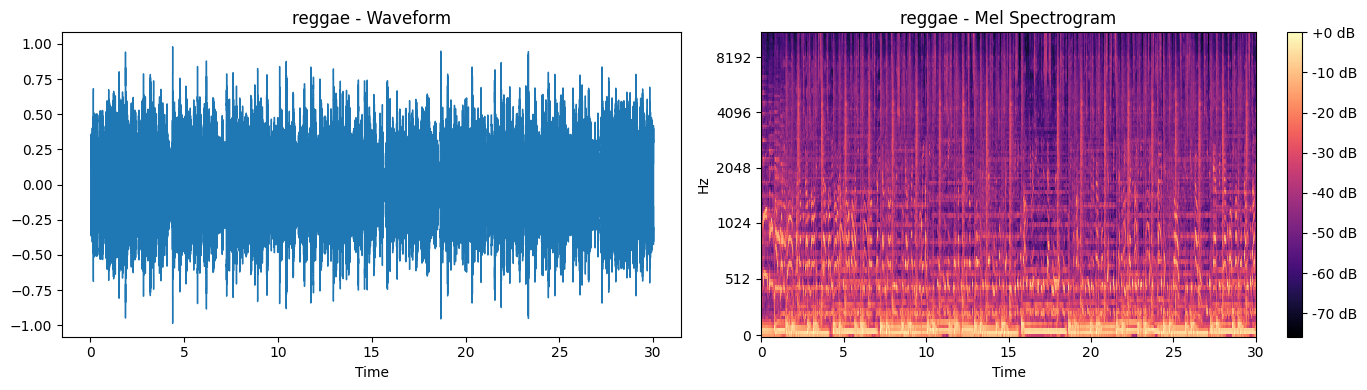

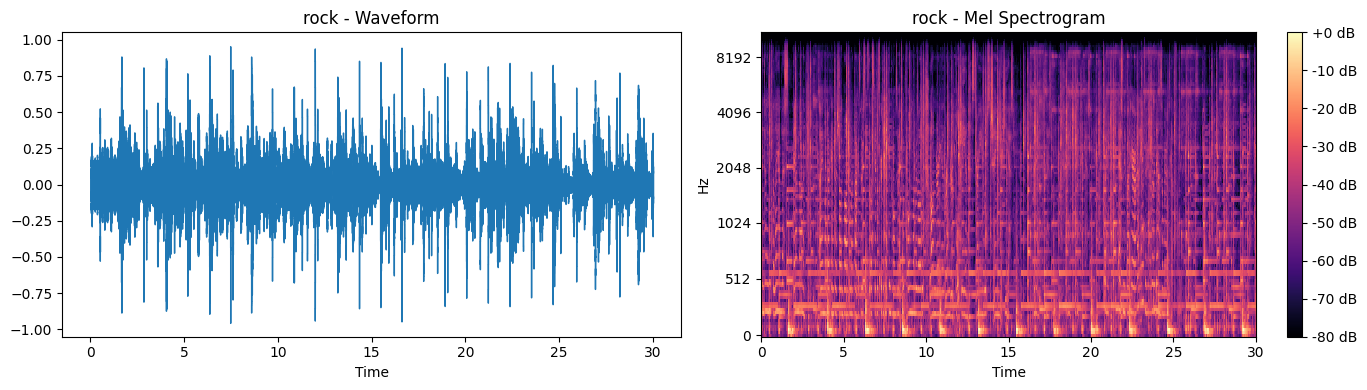

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import numpy as np


for genre in genres:
    file_path = os.path.join(DATA_DIR, genre, os.listdir(os.path.join(DATA_DIR, genre))[0])
    y, sr = librosa.load(file_path)

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"{genre} - Waveform")

    plt.subplot(1, 2, 2)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"{genre} - Mel Spectrogram")

    plt.tight_layout()
    plt.show()


- Amplitude: How strong or loud a sound wave is at a point in time
- Classical has the lowest amplitude, while pop has the highest amplitude

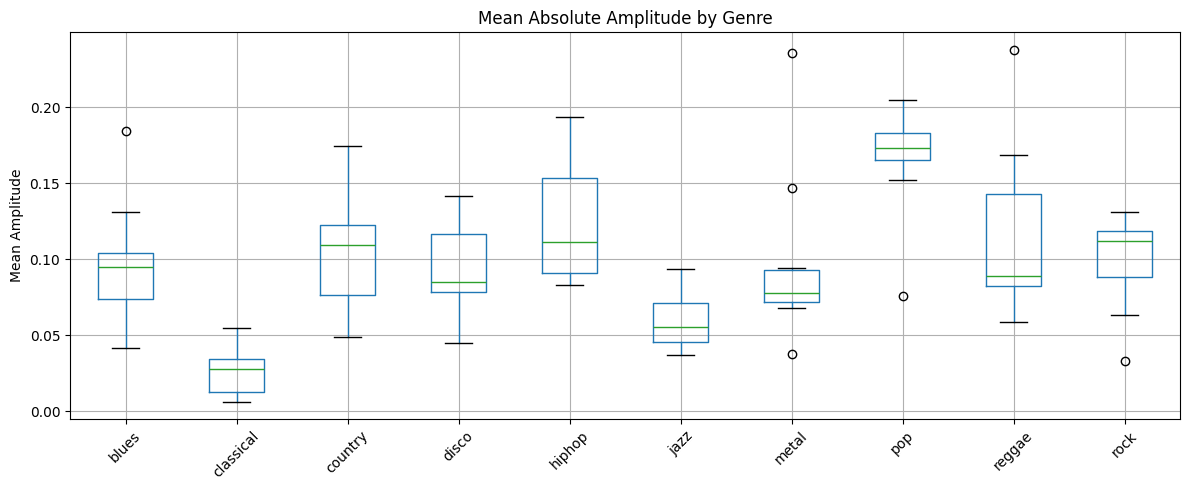

In [ ]:
# Amplitude Stats per Genre
genre_amplitudes = defaultdict(list)

for genre in genres:
    genre_path = os.path.join(DATA_DIR, genre)
    files = os.listdir(genre_path)[:10]  # Sample 10 files per genre
    for file in files:
        y, sr = librosa.load(os.path.join(genre_path, file))
        genre_amplitudes[genre].append(np.mean(np.abs(y)))

amp_df = pd.DataFrame(dict(genre_amplitudes))
amp_df.boxplot(figsize=(12, 5))
plt.title("Mean Absolute Amplitude by Genre")
plt.ylabel("Mean Amplitude")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Text(0, 0.5, 'BPM')

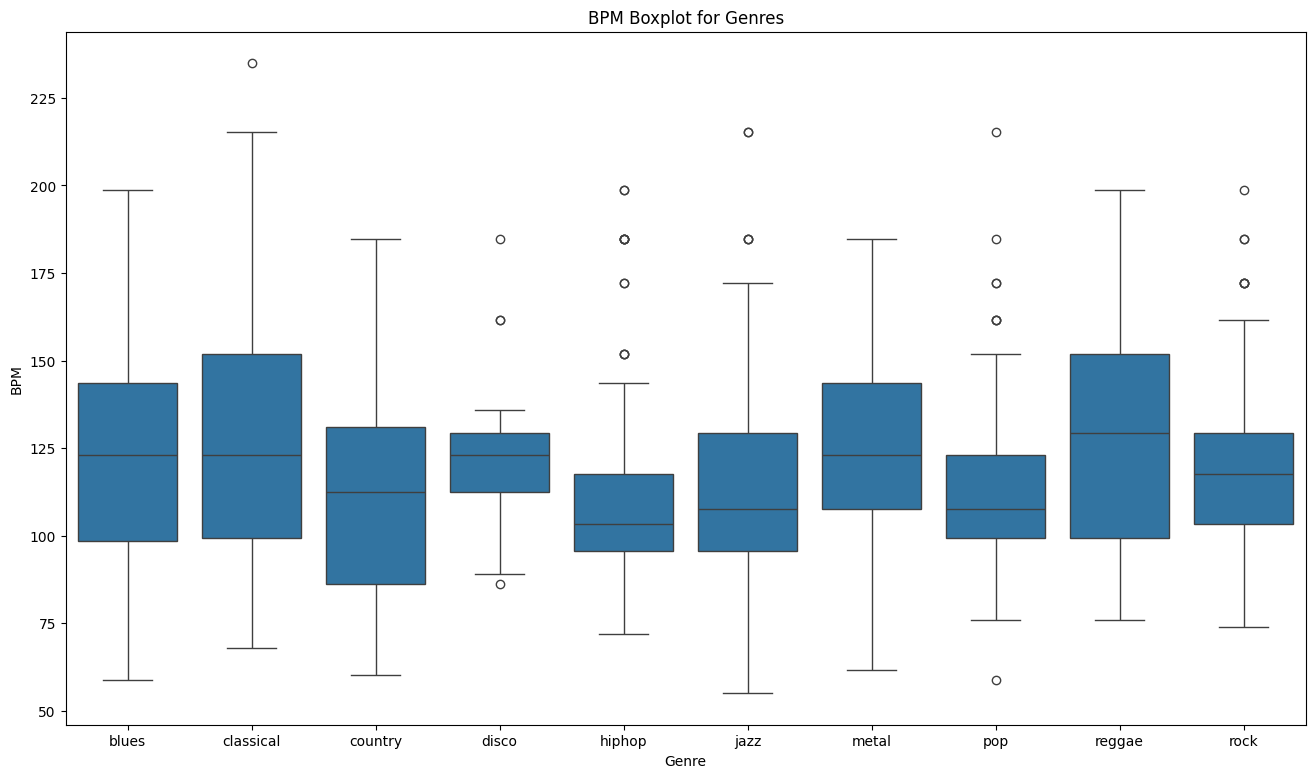

In [ ]:
f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x=data['label'], y=data['tempo'], data=data)

plt.title('BPM Boxplot for Genres')
# plt.xticks(fontsize = 14)
# plt.yticks(fontsize = 10);
plt.xlabel("Genre")
plt.ylabel("BPM")

In [ ]:
# Importing 1 file
y, sr = librosa.load(f'{general_path}/genres_original/reggae/reggae.00036.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)

# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

y: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332
Audio File: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Audio File shape: (661794,)


In [ ]:
data.describe()

length  chroma_stft_mean  chroma_stft_var     rms_mean  \
count    1000.000000       1000.000000      1000.000000  1000.000000   
mean   662030.846000          0.378682         0.086340     0.130930   
std      1784.073992          0.081705         0.007735     0.065683   
min    660000.000000          0.171939         0.044555     0.005276   
25%    661504.000000          0.319562         0.082298     0.086657   
50%    661794.000000          0.383148         0.086615     0.122443   
75%    661794.000000          0.435942         0.091256     0.175682   
max    675808.000000          0.663685         0.108111     0.397973   

           rms_var  spectral_centroid_mean  spectral_centroid_var  \
count  1000.000000             1000.000000           1.000000e+03   
mean      0.003051             2201.780898           4.696916e+05   
std       0.003634              715.960600           4.008995e+05   
min       0.000004              570.040355           7.911251e+03   
25%       0.000942             1627.697311           1.843505e+05   
50%       0.001816             2209.263090           3.384862e+05   
75%       0.003577             2691.294667           6.121479e+05   
max       0.027679             4435.243901           3.036843e+06   

       spectral_bandwidth_mean  spectral_bandwidth_var  rolloff_mean  ...  \
count              1000.000000             1000.000000   1000.000000  ...   
mean               2242.541070           137079.155165   4571.549304  ...   
std                 526.316473            96455.666326   1574.791602  ...   
min                 898.066208            10787.185064    749.140636  ...   
25%                1907.240605            67376.554428   3380.069642  ...   
50%                2221.392843           111977.548036   4658.524473  ...   
75%                2578.469836           182371.576801   5533.810460  ...   
max                3509.646417           694784.811549   8677.672688  ...   

       mfcc16_mean   mfcc16_var  mfcc17_mean   mfcc17_var  mfcc18_mean  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      1.148144    60.730958    -3.966028    62.633624     0.507696   
std       4.578948    33.781951     4.549697    33.479172     3.869105   
min     -15.693844     9.169314   -17.234728    13.931521   -11.963694   
25%      -1.863280    40.376442    -7.207225    40.830875    -2.007015   
50%       1.212809    52.325077    -4.065605    54.717674     0.669643   
75%       4.359662    71.691755    -0.838737    75.040838     3.119212   
max      13.457150   392.932373    11.482946   406.058868    15.388390   

        mfcc18_var  mfcc19_mean   mfcc19_var  mfcc20_mean   mfcc20_var  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean     63.712586    -2.328761    66.231930    -1.095348    70.126096  
std      34.401977     3.755957    37.174631     3.837007    45.228512  
min      15.420555   -18.501955    13.487622   -19.929634     7.956583  
25%      41.884240    -4.662925    41.710184    -3.368996    42.372865  
50%      54.804890    -2.393862    57.423059    -1.166289    59.186117  
75%      75.385832     0.150573    78.626444     1.312615    85.375374  
max     332.905426    14.694924   393.161987    15.369627   506.065155  

[8 rows x 58 columns]

In [ ]:
print(data.shape)
print(data.columns)

(1000, 60)
Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc

### Training

Steps:
Convert audio into a numerical, time-series form (MFCCs)

Make sure all samples are uniform in shape and length

Feed them into the LSTM for training


 1. sample_rate = 22050

The number of samples per second taken from the continuous audio signal.

GTZAN dataset files are already sampled at 22050 Hz.

2. duration = 30
GTZAN clips are 30 seconds long.

It makes sure we have fixed input length across all samples.


3. n_mfcc = 13
MFCC = Mel-Frequency Cepstral Coefficients

Raw audio is too noisy and high-dimensional.

MFCCs capture:Pitch, Tone, Timbre, Rhythmic structure

13 is a classic number in audio ML (used in speech/audio tasks).

4. max_len = 1300
Each 30s MFCC sequence will result in a number of time frames (depends on window/hop length).

We pad or truncate MFCCs to a fixed number of time steps = max_len.


In [ ]:
# Parameters
sample_rate = 22050  # Standard sampling rate
duration = 30  # Seconds
n_mfcc = 13  # Number of MFCC coefficients
max_len = 1300  # Approximate frames for 30s audio (adjust if needed)

# Function to extract MFCCs from an audio file
def extract_features(file_path):
    try:
        audio, sr = librosa.load(file_path, sr=sample_rate, duration=duration)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        # Pad or truncate to fixed length
        if mfccs.shape[1] < max_len:
            mfccs = np.pad(mfccs, ((0, 0), (0, max_len - mfccs.shape[1])), mode='constant')
        else:
            mfccs = mfccs[:, :max_len]
        return mfccs
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Load dataset
data_path = f'{general_path}/genres_original/'
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
features = []
labels = []

for genre in genres:
    genre_path = os.path.join(data_path, genre)
    if not os.path.exists(genre_path):
        print(f"Directory not found: {genre_path}")
        continue
    for file in os.listdir(genre_path):
        if file.endswith('.wav'):
            file_path = os.path.join(genre_path, file)
            mfccs = extract_features(file_path)
            if mfccs is not None:
                features.append(mfccs)
                labels.append(genre)

# Convert to numpy arrays
X = np.array(features)  # Shape: (num_samples, n_mfcc, max_len)
y = np.array(labels)    # Shape: (num_samples,)
print(f"Loaded {X.shape[0]} samples with shape {X.shape} and {len(y)} labels")

<ipython-input-5-ef144f2c20e4>:10: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=sample_rate, duration=duration)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing /content/Data/genres_original/jazz/jazz.00054.wav: 
Loaded 999 samples with shape (999, 13, 1300) and 999 labels


In [ ]:
# Reshape X for scaling: (num_samples, n_mfcc * max_len)
X_reshaped = X.reshape(X.shape[0], -1)  # Shape: (num_samples, n_mfcc * max_len)

# Initialize scaler
scaler = StandardScaler()

# Fit and transform training data
X_scaled = scaler.fit_transform(X_reshaped)  # Shape: (num_samples, n_mfcc * max_len)

# Reshape back to (num_samples, n_mfcc, max_len) for LSTM
X_scaled = X_scaled.reshape(X.shape[0], n_mfcc, max_len)

# Encode labels and split data
le = LabelEncoder()
y_encoded = to_categorical(le.fit_transform(y))
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Reshape for LSTM: (num_samples, max_len, n_mfcc)
X_train = X_train.transpose(0, 2, 1)  # Shape: (num_samples, max_len, n_mfcc)
X_test = X_test.transpose(0, 2, 1)
X_val = X_val.transpose(0, 2, 1)

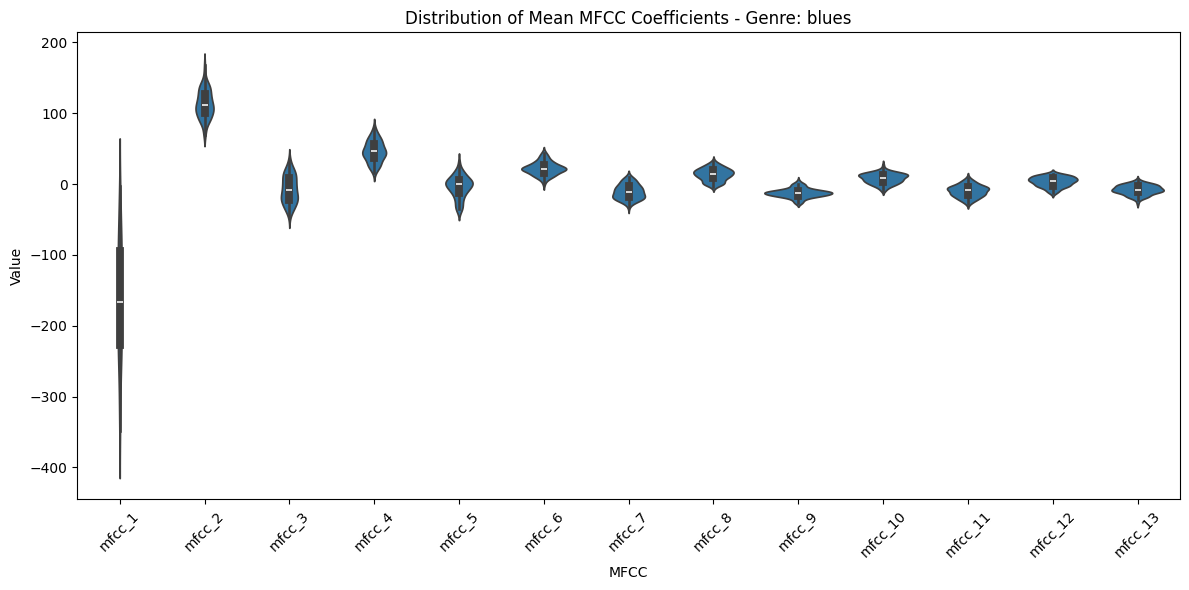

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute mean MFCC vector per sample
mean_mfcc = np.mean(X, axis=2)  # Shape: (num_samples, 13)

# Create DataFrame
mfcc_df = pd.DataFrame(mean_mfcc, columns=[f'mfcc_{i+1}' for i in range(13)])
mfcc_df['genre'] = y

# ✅ Filter for one genre (e.g., 'jazz')
selected_genre = 'blues'
mfcc_df_filtered = mfcc_df[mfcc_df['genre'] == selected_genre]

# Melt for seaborn
mfcc_melted = mfcc_df_filtered.melt(id_vars='genre', var_name='MFCC', value_name='Value')

# Plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=mfcc_melted, x='MFCC', y='Value')
plt.title(f"Distribution of Mean MFCC Coefficients - Genre: {selected_genre}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


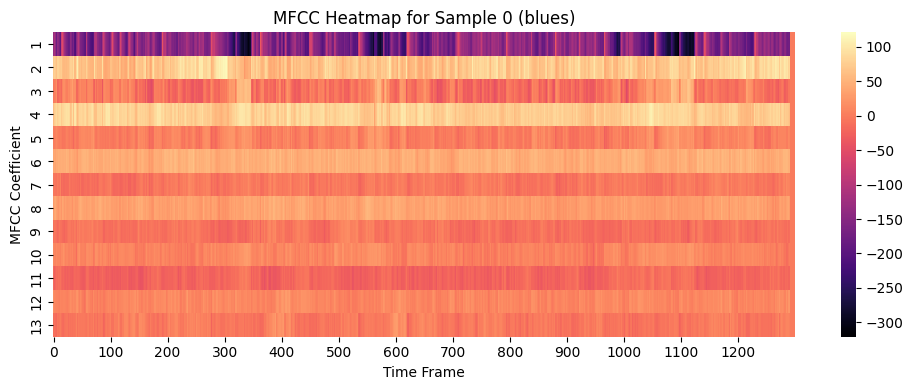

In [ ]:
sample_idx = 0  # change this to view other samples
plt.figure(figsize=(10, 4))
sns.heatmap(X[sample_idx], cmap='magma', xticklabels=100, yticklabels=range(1,14))
plt.title(f"MFCC Heatmap for Sample {sample_idx} ({y[sample_idx]})")
plt.xlabel("Time Frame")
plt.ylabel("MFCC Coefficient")
plt.tight_layout()
plt.show()


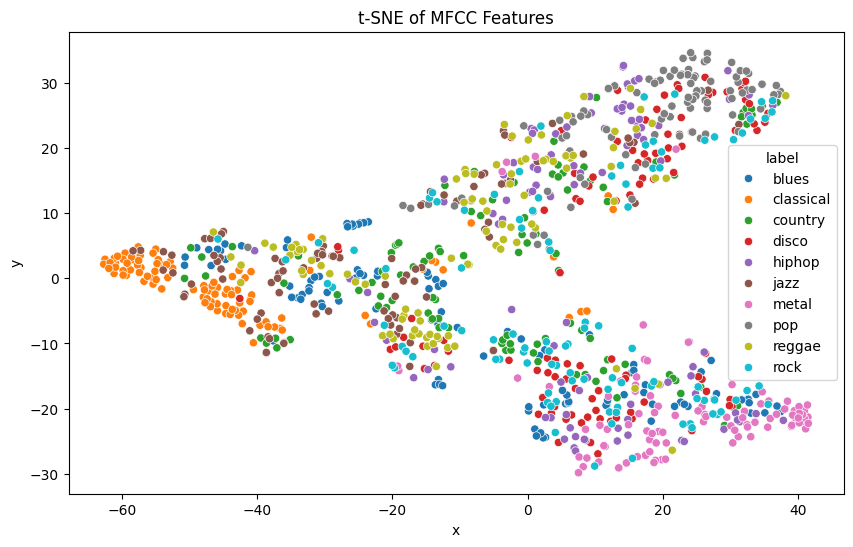

In [ ]:
from sklearn.manifold import TSNE

# Flatten MFCC across time (mean) for each sample
X_flat = np.mean(X, axis=2)

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_flat)

# Plot
tsne_df = pd.DataFrame({'x': X_tsne[:,0], 'y': X_tsne[:,1], 'label': y})
plt.figure(figsize=(10,6))
sns.scatterplot(data=tsne_df, x='x', y='y', hue='label', palette='tab10')
plt.title("t-SNE of MFCC Features")
plt.show()


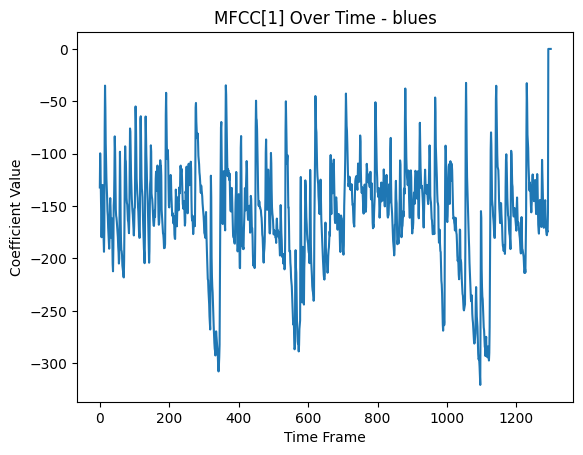

In [ ]:
sample_idx = 0
mfcc_idx = 0  # mfcc_1

plt.plot(X[sample_idx][mfcc_idx])
plt.title(f"MFCC[{mfcc_idx+1}] Over Time - {y[sample_idx]}")
plt.xlabel("Time Frame")
plt.ylabel("Coefficient Value")
plt.show()


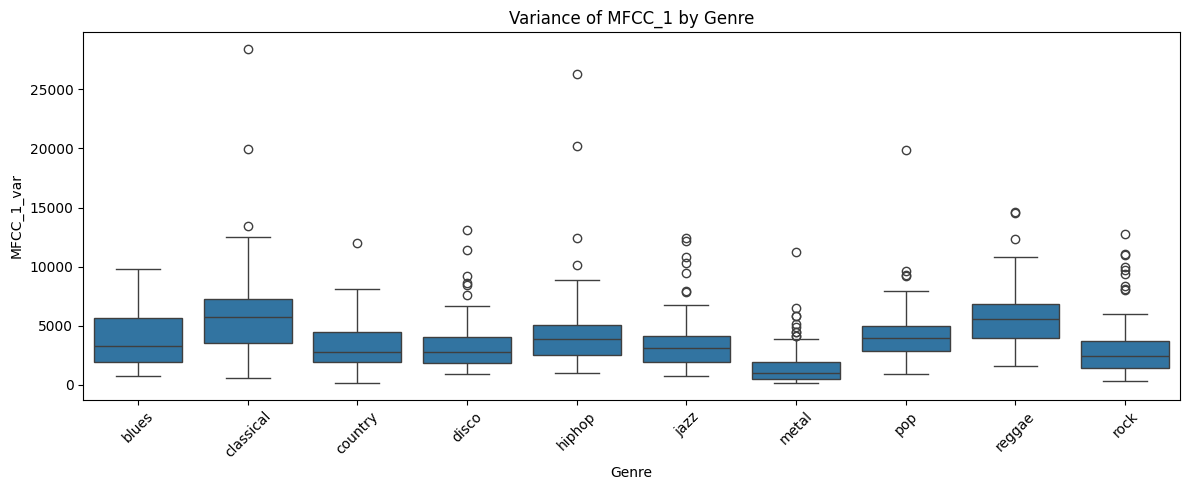

In [ ]:
# Variance of MFCCs over time, averaged per sample
mfcc_var = np.var(X, axis=2)  # shape: (num_samples, n_mfcc)
df_var = pd.DataFrame(mfcc_var, columns=[f"MFCC_{i+1}_var" for i in range(n_mfcc)])
df_var['Genre'] = y

# Plot boxplot for one or more MFCCs
plt.figure(figsize=(12, 5))
sns.boxplot(x='Genre', y='MFCC_1_var', data=df_var)
plt.xticks(rotation=45)
plt.title("Variance of MFCC_1 by Genre")
plt.tight_layout()
plt.show()


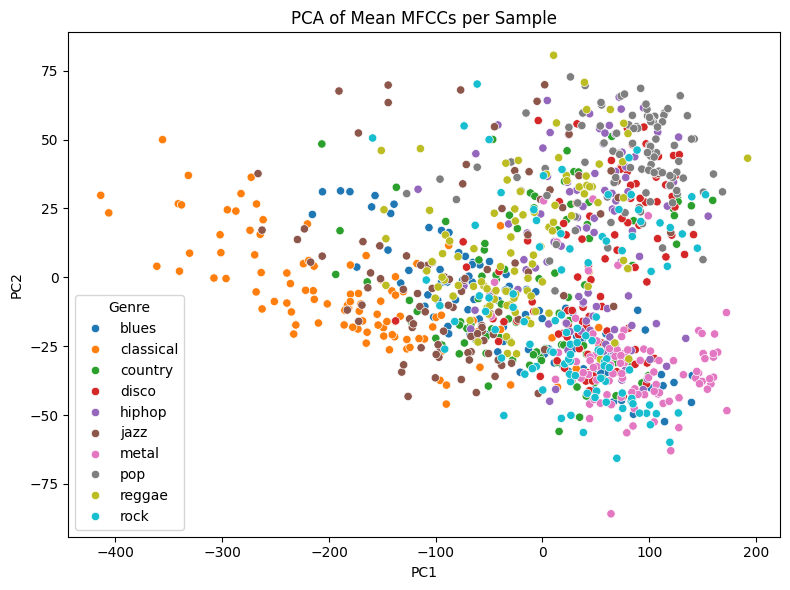

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Use mean MFCC over time as sample-level vector (shape: num_samples x n_mfcc)
mfcc_mean = np.mean(X, axis=2)

# Run PCA (faster) or t-SNE
pca = PCA(n_components=2)
X_proj = pca.fit_transform(mfcc_mean)

df_proj = pd.DataFrame({
    'PC1': X_proj[:, 0],
    'PC2': X_proj[:, 1],
    'Genre': y
})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_proj, x='PC1', y='PC2', hue='Genre', palette='tab10')
plt.title("PCA of Mean MFCCs per Sample")
plt.tight_layout()
plt.show()


### LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Model parameters
input_shape = (max_len, n_mfcc)  # (time_steps, features)
num_classes = len(genres)  # 10 genres

# Build and train LSTM model
LSTM_model = Sequential([
    LSTM(64, input_shape=(max_len, n_mfcc), return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(len(genres), activation='softmax')
])

LSTM_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

LSTM_history = LSTM_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val),callbacks=[early_stopping,reduce_lr])

# Evaluate
test_loss, test_accuracy = LSTM_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}",f"Test Loss: {test_loss:.4f}")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.1268 - loss: 2.2860 - val_accuracy: 0.2937 - val_loss: 2.1406 - learning_rate: 0.0010
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.3052 - loss: 2.0537 - val_accuracy: 0.2500 - val_loss: 1.9683 - learning_rate: 0.0010
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.2950 - loss: 1.9801 - val_accuracy: 0.3187 - val_loss: 1.8585 - learning_rate: 0.0010
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.3653 - loss: 1.8056 - val_accuracy: 0.4437 - val_loss: 1.7412 - learning_rate: 0.0010
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.3750 - loss: 1.7639 - val_accuracy: 0.4313 - val_loss: 1.6854 - learning_rate: 0.0010
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.4611 - loss: 1.5527 - val_accuracy: 0.4688 - val_loss: 1.6348 - learning_rate: 0.0010
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.4659 - loss: 1.5912 - val_accuracy: 0.4

### ResLSTM

Residual Connections: adds the input of a layer to its output to mitigate the vanishing gradient problem by allowing gradients to flow more easily through the network.

LSTM Layer: handles sequential data by maintaining an internal memory cell that captures long-term dependencies.

Combined Model: incorporates residual connections within an LSTM network to learn complex patterns and long-term dependencies.

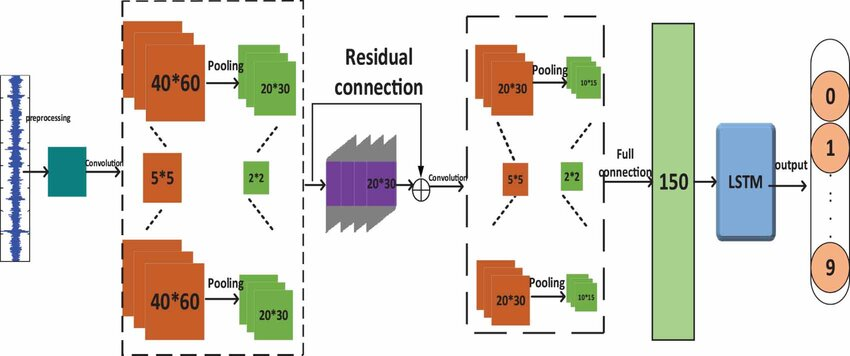

In [ ]:
from keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Input shape: (time_steps, n_mfcc)
inputs = Input(shape=(1300, 13))

# 1st block
x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(inputs)
x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)  # (1300 -> 650)
x=Dropout(0.3)(x)

# 2nd block
x = Conv1D(128, kernel_size=3, padding='same', activation='relu')(x)
x = Conv1D(128, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)  # (650 -> 325)
x=Dropout(0.3)(x)

# 3rd block
x = Conv1D(256, kernel_size=3, padding='same', activation='relu')(x)
x = Conv1D(256, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)  # (325 -> 162)
x=Dropout(0.4)(x)

# LSTM block
x = LSTM(128)(x)
x=Dropout(0.5)(x)

# Fully connected output
outputs = Dense(units=10, activation='softmax')(x)

# Build model
Ensemble_model = Model(inputs=inputs, outputs=outputs)
Ensemble_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

Ensemble_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1300, 13)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 1300, 64)       │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1300, 64)       │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 650, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 650, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 650, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 650, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 325, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 325, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 325, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 325, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 162, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 162, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 582,730 (2.22 MB)

 Trainable params: 582,730 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

Ensemble_history = Ensemble_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop,reduce_lr]
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.1353 - loss: 2.2917 - val_accuracy: 0.2562 - val_loss: 2.2654 - learning_rate: 1.0000e-04
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.1729 - loss: 2.2486 - val_accuracy: 0.3250 - val_loss: 2.1898 - learning_rate: 1.0000e-04
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2577 - loss: 2.1393 - val_accuracy: 0.3250 - val_loss: 2.0096 - learning_rate: 1.0000e-04
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2997 - loss: 1.9422 - val_accuracy: 0.3250 - val_loss: 1.8908 - learning_rate: 1.0000e-04
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.2950 - loss: 1.9164 - val_accuracy: 0.3500 - val_loss: 1.8369 - learning_rate: 1.0000e-04
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3304 - loss: 1.7692 - val_accuracy: 0.3688 - val_loss: 1.7829 - learning_rate: 1.0000e-04
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3362 

### ConvLSTM

Convolutional Layer: operates on the spectrogram or other feature representation to extract spatial features across the frequency bands.

LSTM Layer: processes the temporal dimension, capturing long-term dependencies and sequential patterns.

Combined Model: ConvLSTM can effectively model the spatio-temporal dynamics of the audio signal.

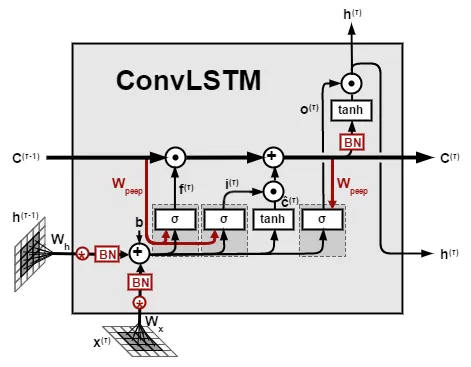

In [ ]:
from keras.layers import Input, Conv1D, LSTM, Dense, Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Define input shape based on MFCCs: (time_steps=1300, features=13)
inputs = Input(shape=(1300, 13))

# Conv1D block
x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(inputs)
x = Dropout(0.3)(x)

# LSTM layers (stacked)
x = LSTM(units=128, return_sequences=True)(x)
x = LSTM(units=128, return_sequences=True)(x)
x = LSTM(units=128)(x)

# Dropout before output
x = Dropout(0.5)(x)

# Output layer
outputs = Dense(units=10, activation='softmax')(x)

# Build model
Conv_model = Model(inputs=inputs, outputs=outputs, name='ConvLSTM')
Conv_model.compile(optimizer=Adam(learning_rate=1e-4),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

Conv_model.summary()

Model: "ConvLSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1300, 13)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 1300, 64)       │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1300, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1300, 128)      │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1300, 128)      │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,834 (1.40 MB)

 Trainable params: 365,834 (1.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

Conv_history = Conv_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop,reduce_lr]
)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - accuracy: 0.1260 - loss: 2.2832 - val_accuracy: 0.2500 - val_loss: 2.2297 - learning_rate: 1.0000e-04
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.2219 - loss: 2.2155 - val_accuracy: 0.3125 - val_loss: 2.1161 - learning_rate: 1.0000e-04
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.2561 - loss: 2.1006 - val_accuracy: 0.3313 - val_loss: 2.0007 - learning_rate: 1.0000e-04
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.3084 - loss: 1.9881 - val_accuracy: 0.3562 - val_loss: 1.9228 - learning_rate: 1.0000e-04
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.3175 - loss: 1.9117 - val_accuracy: 0.3750 - val_loss: 1.8696 - learning_rate: 1.0000e-04
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - accuracy: 0.3310 - loss: 1.8718 - val_accuracy: 0.4000 - val_loss: 1.8311 - learning_rate: 1.0000e-04
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 

### Evaluation

In [ ]:
def plot_history(history, title="Model"):
    plt.figure(figsize=(14, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
def evaluate_model(model, x_test, y_test, label_encoder, name="Model"):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix, classification_report
    import seaborn as sns

    # Evaluate test accuracy
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"\n{name} - Test Accuracy: {acc:.4f}")

    # Predict class probabilities and convert to class indices
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Classification report
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [ ]:
from collections import Counter
import numpy as np

def get_top_misclassifications(model, x_test, y_test, label_encoder, top_n=5):
    # Predict class probabilities
    y_pred_probs = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

    # Convert one-hot true labels to integer labels
    y_true_classes = np.argmax(y_test, axis=1)

    # Decode class labels back to original strings
    actual = label_encoder.inverse_transform(y_true_classes)
    predicted = label_encoder.inverse_transform(y_pred_classes)

    # Count misclassifications
    errors = [(a, p) for a, p in zip(actual, predicted) if a != p]
    error_counts = Counter(errors)

    print(f"\nTop {top_n} Misclassifications (Actual → Predicted):")
    for (true, pred), count in error_counts.most_common(top_n):
        print(f"{true:10s} → {pred:10s}: {count} times")


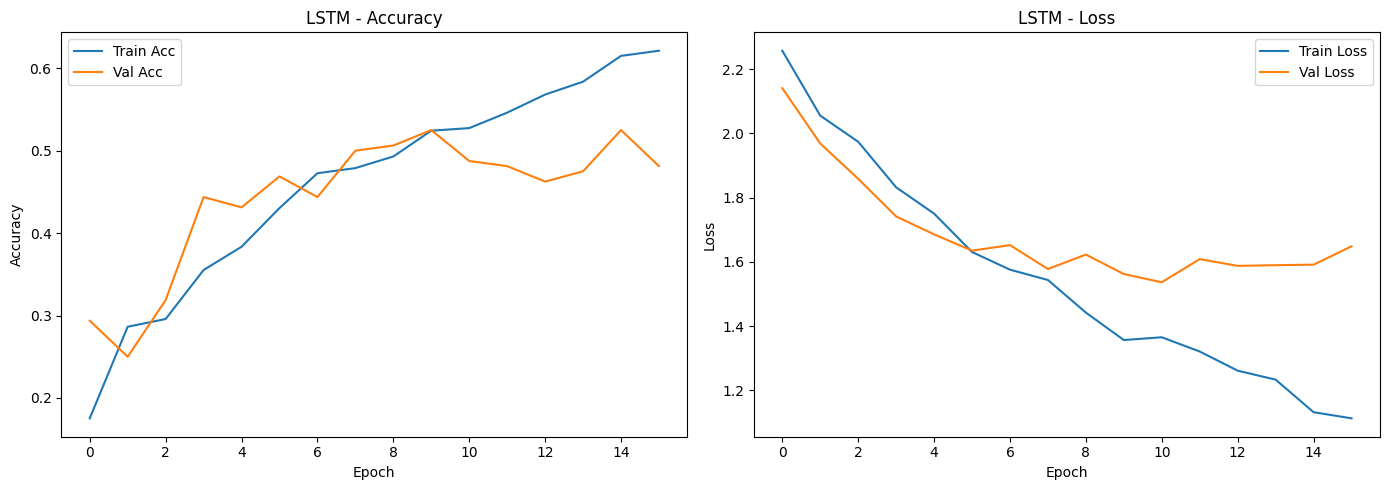

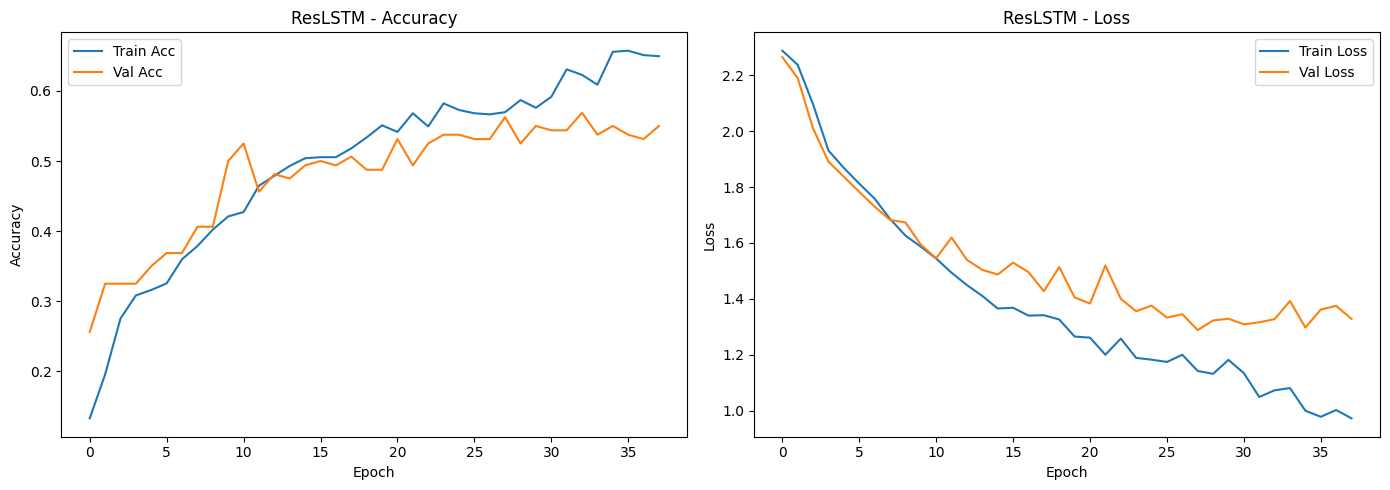

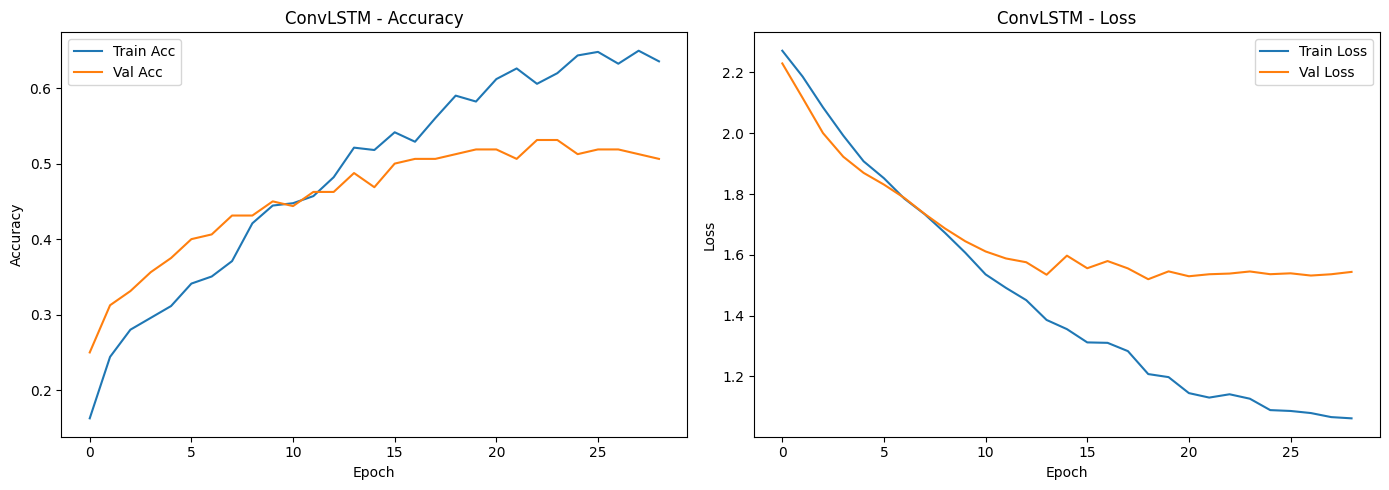

In [ ]:
plot_history(LSTM_history, title="LSTM")
plot_history(Ensemble_history, title="ResLSTM")
plot_history(Conv_history, title="ConvLSTM")


LSTM - Test Accuracy: 0.3700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

LSTM - Classification Report:
              precision    recall  f1-score   support

       blues       0.62      0.38      0.47        21
   classical       0.59      0.83      0.69        12
     country       0.25      0.21      0.23        24
       disco       0.07      0.05      0.06        22
      hiphop       0.14      0.13      0.14        15
        jazz       0.41      0.41      0.41        27
       metal       0.55      0.61      0.58        18
         pop       0.41      0.84      0.55        19
      reggae       0.18      0.09      0.12        22
        rock       0.32      0.40      0.36        20

    accuracy                           0.37       200
   macro avg       0.35      0.40      0.36       200
weighted avg       0.34      0.37      0.34       200



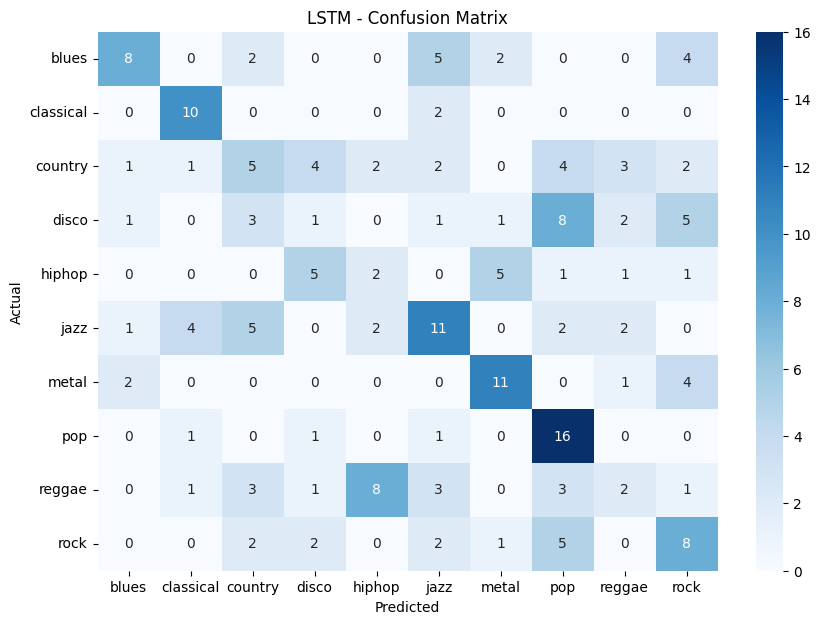

In [ ]:
evaluate_model(LSTM_model, X_test, y_test, le, name="LSTM")


ResLSTM - Test Accuracy: 0.5350
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

ResLSTM - Classification Report:
              precision    recall  f1-score   support

       blues       0.62      0.71      0.67        21
   classical       0.65      0.92      0.76        12
     country       0.57      0.33      0.42        24
       disco       0.42      0.23      0.29        22
      hiphop       0.38      0.40      0.39        15
        jazz       0.60      0.56      0.58        27
       metal       0.67      0.78      0.72        18
         pop       0.47      0.95      0.63        19
      reggae       0.53      0.41      0.46        22
        rock       0.38      0.30      0.33        20

    accuracy                           0.54       200
   macro avg       0.53      0.56      0.52       200
weighted avg       0.53      0.54      0.51       200



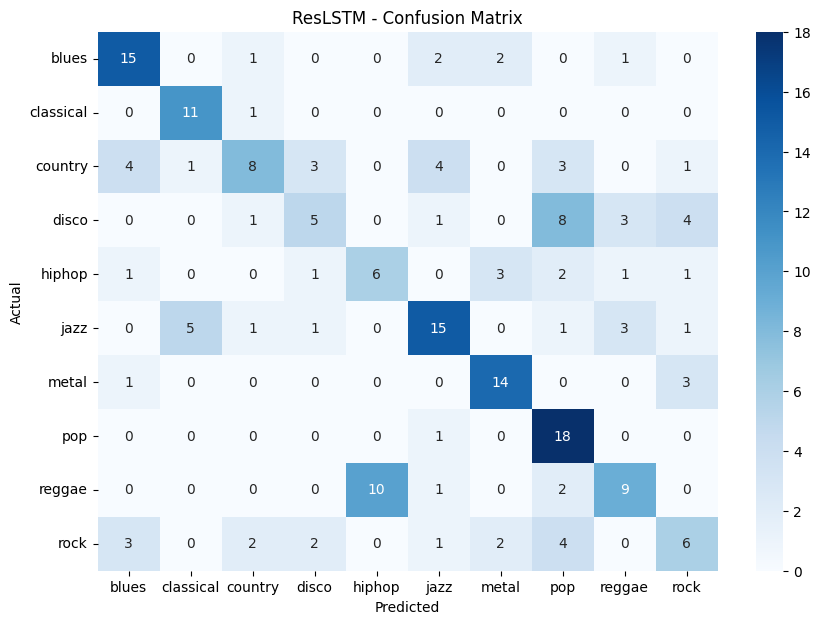

In [ ]:
evaluate_model(Ensemble_model, X_test, y_test, le, name="ResLSTM")


ConvLSTM - Test Accuracy: 0.4000
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step

ConvLSTM - Classification Report:
              precision    recall  f1-score   support

       blues       0.53      0.43      0.47        21
   classical       0.53      0.75      0.62        12
     country       0.17      0.12      0.14        24
       disco       0.18      0.14      0.15        22
      hiphop       0.28      0.33      0.30        15
        jazz       0.48      0.37      0.42        27
       metal       0.55      0.61      0.58        18
         pop       0.53      0.84      0.65        19
      reggae       0.38      0.36      0.37        22
        rock       0.29      0.30      0.29        20

    accuracy                           0.40       200
   macro avg       0.39      0.43      0.40       200
weighted avg       0.38      0.40      0.38       200



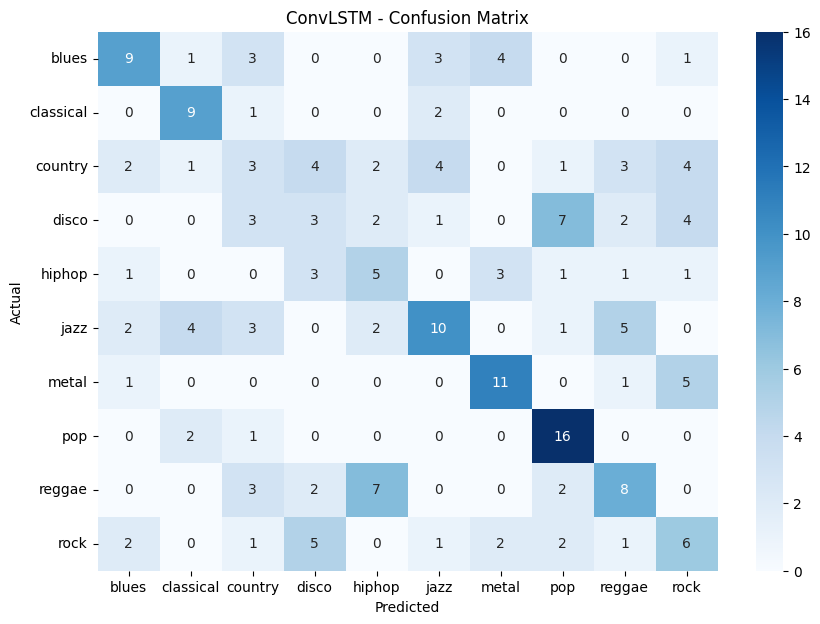

In [ ]:
evaluate_model(Conv_model, X_test, y_test, le, name="ConvLSTM")

In [ ]:
lstm_acc = LSTM_model.evaluate(X_test, y_test, verbose=0)[1]
res_acc = Ensemble_model.evaluate(X_test, y_test, verbose=0)[1]
conv_acc = Conv_model.evaluate(X_test, y_test, verbose=0)[1]

print("\n Test Accuracy Comparison")
print(f"LSTM  Accuracy: {lstm_acc:.4f}")
print(f"ResLSTM  Accuracy: {res_acc:.4f}")
print(f"ConvLSTM Accuracy: {conv_acc:.4f}")


 Test Accuracy Comparison
LSTM  Accuracy: 0.3700
ResLSTM  Accuracy: 0.5350
ConvLSTM Accuracy: 0.4000


In [ ]:
get_top_misclassifications(LSTM_model, X_test, y_test, le)
get_top_misclassifications(Ensemble_model, X_test, y_test, le)
get_top_misclassifications(Conv_model, X_test, y_test, le)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step

Top 5 Misclassifications (Actual → Predicted):
disco      → pop       : 8 times
reggae     → hiphop    : 8 times
hiphop     → disco     : 5 times
hiphop     → metal     : 5 times
jazz       → country   : 5 times
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Top 5 Misclassifications (Actual → Predicted):
reggae     → hiphop    : 10 times
disco      → pop       : 8 times
jazz       → classical : 5 times
country    → blues     : 4 times
rock       → pop       : 4 times
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

Top 5 Misclassifications (Actual → Predicted):
reggae     → hiphop    : 7 times
disco      → pop       : 7 times
metal      → rock      : 5 times
rock       → disco     : 5 times
jazz       → reggae    : 5 times


In [ ]:
def predict_samples(model, x_test, y_test, label_encoder, num_samples=10):
    # Predict class probabilities and convert to class indices
    y_pred_probs = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

    # Convert true labels from one-hot to class indices
    y_true_classes = np.argmax(y_test, axis=1)

    # Decode class indices to original labels
    actual = label_encoder.inverse_transform(y_true_classes)
    predicted = label_encoder.inverse_transform(y_pred_classes)

    print("\nSample Predictions:")
    for i in range(num_samples):
        print(f"Sample {i+1:2d}: Actual: {actual[i]:10s} | Predicted: {predicted[i]:10s}")


In [ ]:
predict_samples(LSTM_model, X_test, y_test, le, num_samples=10)
predict_samples(Ensemble_model, X_test, y_test, le, num_samples=10)
predict_samples(Conv_model, X_test, y_test, le, num_samples=10)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

Sample Predictions:
Sample  1: Actual: hiphop     | Predicted: disco     
Sample  2: Actual: pop        | Predicted: pop       
Sample  3: Actual: country    | Predicted: pop       
Sample  4: Actual: disco      | Predicted: pop       
Sample  5: Actual: pop        | Predicted: jazz      
Sample  6: Actual: jazz       | Predicted: classical 
Sample  7: Actual: reggae     | Predicted: pop       
Sample  8: Actual: jazz       | Predicted: pop       
Sample  9: Actual: hiphop     | Predicted: disco     
Sample 10: Actual: metal      | Predicted: blues     
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Sample Predictions:
Sample  1: Actual: hiphop     | Predicted: disco     
Sample  2: Actual: pop        | Predicted: pop       
Sample  3: Actual: country    | Predicted: pop       
Sample  4: Actual: disco      | Predicted: pop       
Sample  5: Actual: pop        | Predicted: pop       
Sample  6: Actual: jazz       | Predicted: classical 
Sample  7: Actual:

## Deployment
Deployment steps would vary greatly depending on our use case, scalability needs, and budget. If we were to deploy this model in production, we would:

1. Save our most reliable version of the model to **MLFLow**'s model registry.
2. Include code to preprocess new MP3 files into waveform data and calculated features.
3. Containerize the **MLFlow** model with **Docker**.
4. Deploy our **Docker** image to **Google Cloud Run**.
5. Call our model on-demand via HTTP.

## Requirements

**Cloud Services:** Google Colab

**Operating System:** Ubuntu 22.04.4 LTS

**Python Version:** Python 3.11.12

**Notable Python Libraries Used:**
- kagglehub
- librosa
- tensorflow
- pandas
- numpy
- seaborn
- matplotlib

In [ ]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
  print('Uploaded file "{name}" with length {length} bytes'.format(
      name=filename, length=len(uploaded[filename])))
  print(uploaded[filename].decode('utf-8'))


Saving requirements (2).txt to requirements (2).txt
Uploaded file "requirements (2).txt" with length 12837 bytes
absl-py==1.4.0
accelerate==1.6.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.6
ale-py==0.11.0
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.21.0
astropy==7.0.2
astropy-iers-data==0.2025.5.12.0.38.29
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.4.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.3.2
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
build==1.2.2.post1
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.4.26
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.2
chex==0.1

## Conclusion

- Working with MP3 and waveform data can lead to massive dataset sizes very quickly. A standard sampling rate for an MP3 file is 44,100 Hz, which scales up to 1.3 million samples in a 30 second audio clip. Doing this for thousands of songs can prove very costly, so it is of utmost importance to find ways to limit training volume.
- ResLSTM outperforms ConvLSTM & LSTM in overall accuracy, recall, precision, and f1-score across all classes. ResLSTM also minimize the overfitting
- Disco and reggae are the most vulnerable genre to predict from all models (most missclassified happened in these genres)



- LSTM
Weakest performance overall.

Very low recall and precision on classes like disco, hiphop, and reggae.

Stronger on classical and pop, but not enough to generalize.

- ResLSTM (LSTM with Conv blocks before)

Best performance across all metrics.

Excellent performance on classical, metal, and pop.

Improved class balance — recall and precision are more consistent.

Likely benefits from richer feature extraction via Conv1D before LSTM.

- ConvLSTM

Better than LSTM, but not as good as ResLSTM.

Performs well on metal and pop, but struggles with country, disco, and rock.

May need deeper Conv blocks or better regularization/tuning.

# Recommendation
- Use ResLSTM as base model
- Try data augmentation	Especially for weak classes like country, disco, hiphop
- Add batch normalization and residual connectionn. May further boost ConvLSTM performance
- Explore Mel spectrogram input instead of MFCC. CNN-based models may learn better from image-like inputs